In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.classifier import *
#import shap
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.naive_bayes import *
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import loguniform
from skopt import BayesSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
data =  pd.read_csv('in-vehicle-coupon-recommendation.csv')
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


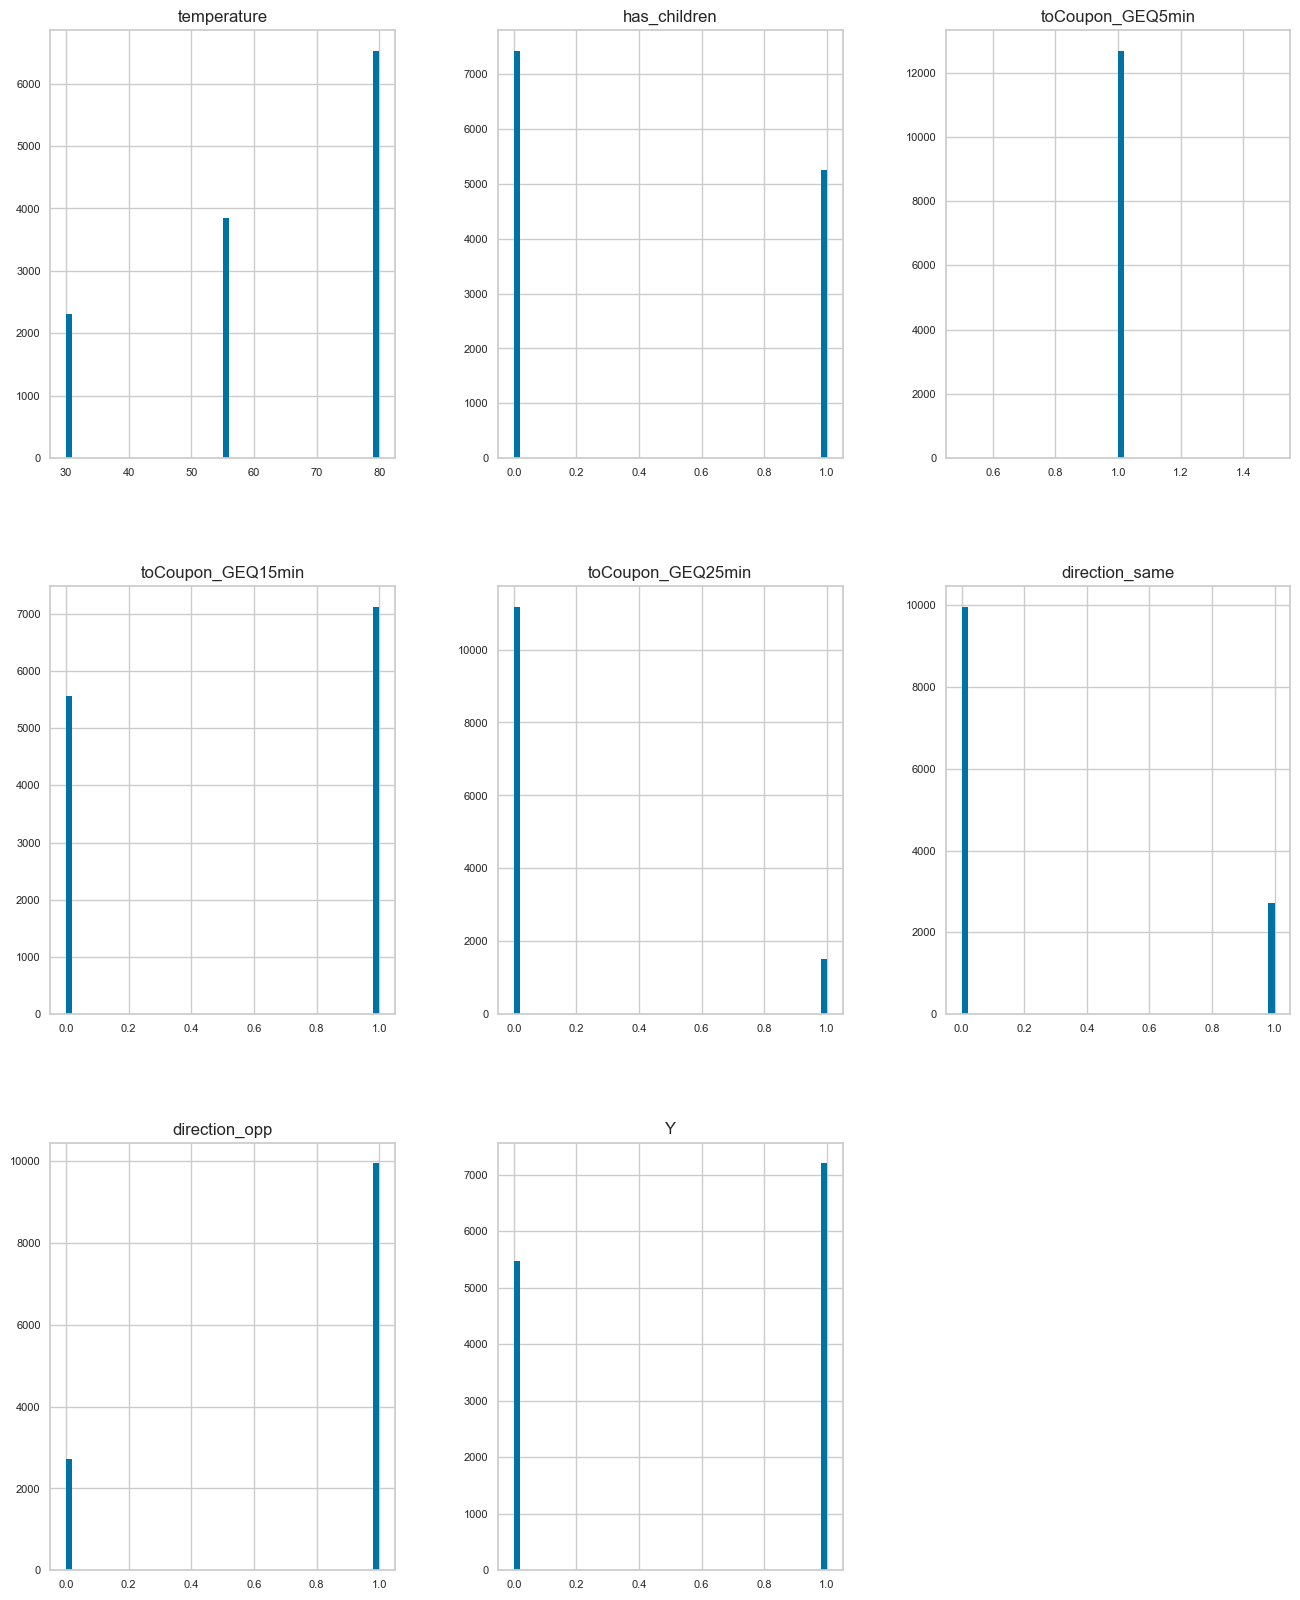

In [3]:
def data_preprocessing(data):
    # Display DataFrame info
    print("DataFrame Info:")
    data.info()

    # Display DataFrame description
    print("\nDataFrame Description:")
    print(data.describe())

    # Display null values count
    print("\nNull Values Count:")
    print(data.isnull().sum())

    # Display duplicated rows count
    print("\nDuplicated Rows Count:", data.duplicated().sum())

    # Display number of unique values in each column
    print("\nNumber of Unique Values in Each Column:")
    print(data.nunique())
    
    # Plot histrogram for all column
    data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    
    return data
data = data_preprocessing(data)
data


In [6]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Iterate through each column and apply label encoding
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

# Concatenate the label-encoded features with the target variable
data = pd.concat([data], axis=1)

data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,1,2,4,0,0,0,3,...,4,5,1,0,0,0,0,0,1,1
1,1,1,2,2,0,2,1,0,0,3,...,4,5,1,0,0,0,0,0,1,0
2,1,1,2,2,0,1,1,0,0,3,...,4,5,1,0,0,1,0,0,1,1
3,1,1,2,2,2,2,1,0,0,3,...,4,5,1,0,0,1,0,0,1,0
4,1,1,2,2,2,2,0,0,0,3,...,4,5,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,3,0,1,3,1,0,1,1,2,...,4,0,1,0,0,0,0,1,0,1
12680,2,0,0,1,4,1,0,1,1,2,...,4,0,1,0,0,0,0,0,1,1
12681,2,0,1,0,4,2,0,1,1,2,...,4,0,1,0,0,0,0,1,0,0
12682,2,0,1,0,4,0,0,1,1,2,...,4,0,1,0,0,1,1,0,1,0


<Axes: >

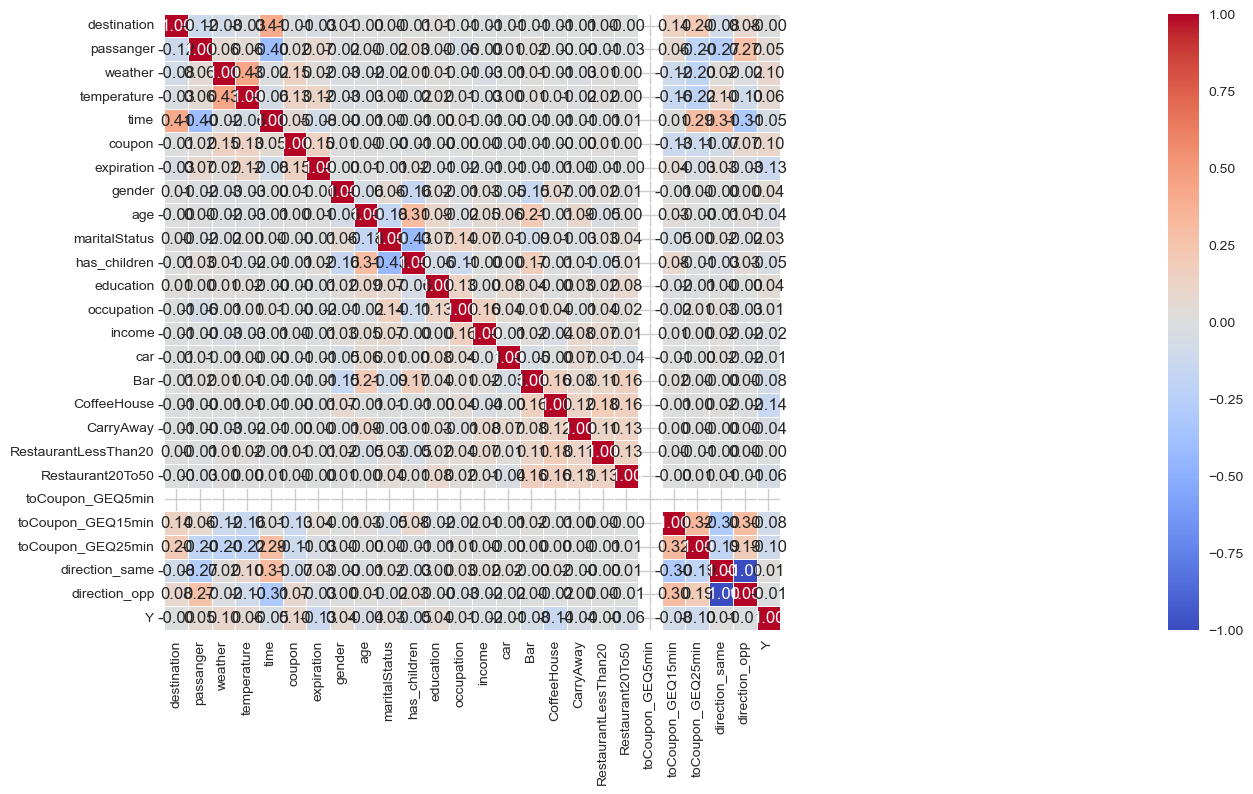

In [23]:
plt.figure(figsize=(100, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", square=True)

In [13]:
# separating the data & label
X = data.drop(columns = ['Y'],axis=1)
y = data['Y']

In [22]:
# Assuming you have your features X and target variable y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Display feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importances)

# Select features with importance above a certain threshold
sfm = SelectFromModel(rf, threshold=0.05)
sfm.fit(X_train, y_train)

# Transform the training set and test set
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train a classifier on the selected features
selected_rf = RandomForestClassifier(n_estimators=100, random_state=42)
selected_rf.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = selected_rf.predict(X_test_selected)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set with selected features: {accuracy:.2f}")


Feature Importance:
                 Feature  Importance
5                 coupon        0.11
12            occupation        0.09
13                income        0.07
16           CoffeeHouse        0.07
8                    age        0.06
4                   time        0.06
15                   Bar        0.05
11             education        0.05
17             CarryAway        0.05
18  RestaurantLessThan20        0.05
19      Restaurant20To50        0.04
9          maritalStatus        0.04
1              passanger        0.04
3            temperature        0.04
6             expiration        0.03
21     toCoupon_GEQ15min        0.03
0            destination        0.03
7                 gender        0.02
2                weather        0.02
10          has_children        0.02
22     toCoupon_GEQ25min        0.01
23        direction_same        0.01
24         direction_opp        0.01
14                   car        0.00
20      toCoupon_GEQ5min        0.00
Accuracy on the te

Metrics for Gaussian Naive Bayes:
Accuracy: 0.6156
AUC: 0.6334
Recall: 0.7596
Precision: 0.6353
F1 Score: 0.6919


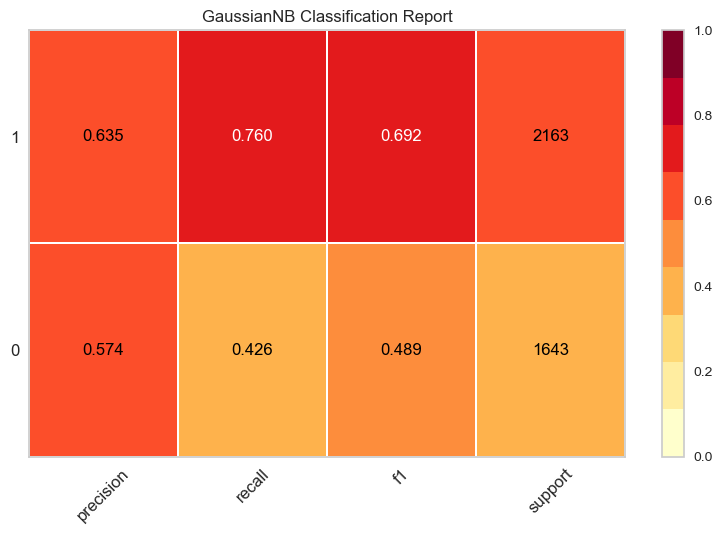

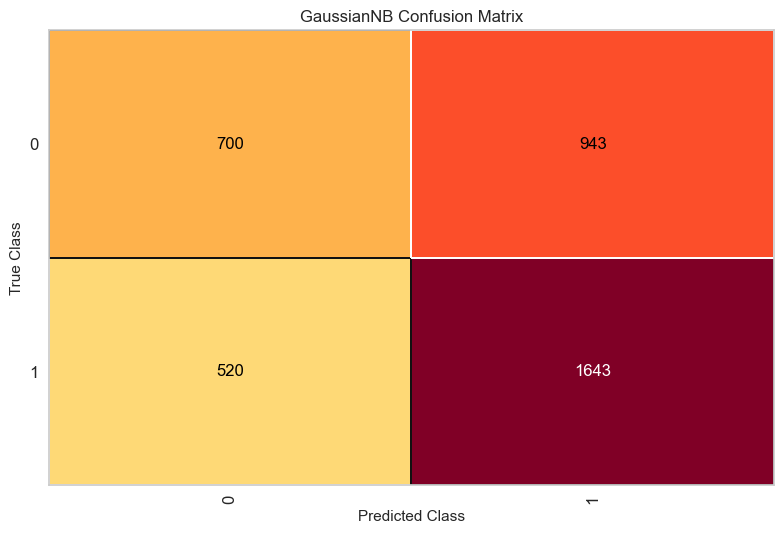

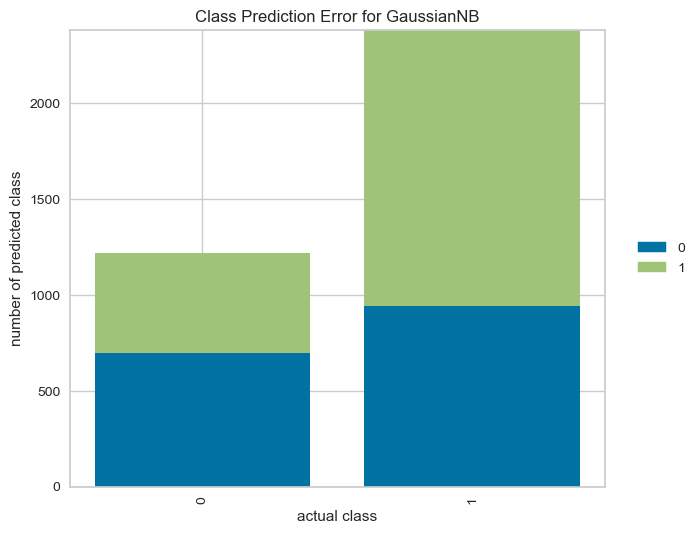

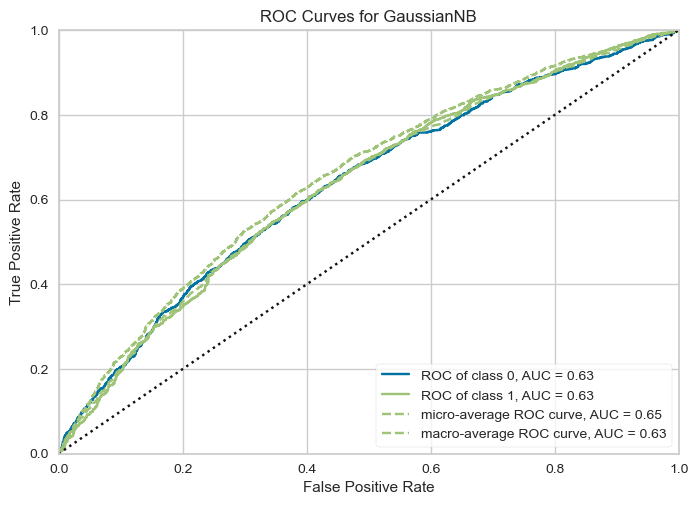

In [19]:
# Define the hyperparameter search space
param_space = {
    'var_smoothing': (1e-12, 1e-2, 'log-uniform')  
}

# Initialize the classifier
gnb = GaussianNB()

# Initialize BayesianOptimization with the Naive Bayes classifier and hyperparameter space
opt = BayesSearchCV(
    gnb,
    param_space,
    n_iter=50,  # Number of iterations for the Bayesian optimization
    cv=5,      # Number of cross-validation folds
    n_jobs=-1,  # Use all available cores for parallelization
    random_state=42
)

# Fit the BayesianOptimization to search for the best hyperparameters
opt.fit(X_train, y_train)

# Get the best hyperparameters found by BayesianOptimization
best_params = opt.best_params_

# Create a list of classifiers with the best hyperparameters
classifiers = [
    ("Gaussian Naive Bayes", GaussianNB(**best_params))
]
# Loop over classifiers and evaluate/visualize each one
for name, classifier in classifiers:
    # Fit the classifier
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)

    # Print the metrics
    print(f"Metrics for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1_score:.4f}")

    # Instantiate the visualizer
    visualizers = [
        ClassificationReport(classifier, support=True),
        ConfusionMatrix(classifier),
        ClassPredictionError(classifier),
        ROCAUC(classifier)
    ]

    # Evaluate and visualize each visualizer
    for viz in visualizers:
        plt.figure()
        viz.fit(X_train, y_train)
        viz.score(X_test, y_test)
        viz.show()

plt.show()
